# Deep Learning Methods for Medical Image Analysis (CM2003)

# Laboratory Assignment 3: Part 2 - Regularization Techniques

Lab Group 8:
- Gnana Spandana Akumalla
- Patrik Svensson
- Serkan Arda Yilal

In [1]:
import os
import numpy as np
import pandas as pd
from random import shuffle
from skimage.io import imread
from skimage.transform import resize
from keras.utils.np_utils import to_categorical   
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout, BatchNormalization, SpatialDropout2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt

#In case you would like to import the functions from python files containing the functions, import following lines

from Models import lenet_model, alexnet_model, vgg16_model
from DataLoader import gen_labels_multiclass, get_data_multiclass, get_data_arrays, get_train_test_arrays_multiclass


In [2]:
def model_trainer(learning_rate, epochs, n_base, batch_size, x_train, y_train, x_test, y_test,
                  dropout = None, n_class = 2, first2_dense = [64, 64],
                  batch_norm = False, s_dropout = None,
                  loss = "BinaryCrossentropy", optimizer = "Adam",model_type = "alexnet", verbose = 1):
    
#Function for training model and returning classifier history

#------INPUTS------
#learning_rate = value for learning rate
#epoch = number of epochs
#n_base: feature map size
#batch_size = batch size to be used in training
#x_train: training data
#y_train: training labels
#x_test: test data
#y_test: test labels
#dropout = float value to be used in dropout. Default is None so it is inactive. Enter a float value to activate it.
#n_class = number of classes to be predicted. Defines the number of neurons in last dense layer. if 2 classes exist, 1 neuron with sigmoid is used.
#first2_dense = number of neurons to be used in first and second dense layer.
#batch_norm = boolean value for activating batch normalization
#s_droput = float value to be used in spatial dropout. Default is None so it is inactive. Enter a float value to activate it.
#loss = type of loss.
#optimizer = type of optimizer. Can be Adam, SGD, RMSprop
#model_type = parameter for deciding which model should be trained. The options are lenet, alexnet, and rgg16.
#verbose = shows the details of the training. 2 or more will give more details while 1 give no details.

#------OUTPUTS------
#clf_hist = classifier history during training.
    
    if n_class == 2:
        metrics = ["binary_accuracy"]
    elif n_class > 2:
        metrics = ["sparse_categorical_accuracy"]
    
    if model_type == "lenet":  
        clf = lenet_model(img_w, img_h, 1, n_base, n_class = n_class)
    elif model_type == "alexnet":
        clf = alexnet_model(img_w, img_h, 1, n_base, dropout = dropout, n_class = n_class, first2_dense = first2_dense,
                  batch_norm = batch_norm, s_dropout = s_dropout)
    elif model_type == "vgg16":
        clf = vgg16_model(img_w, img_h, 1, n_base, dropout = dropout, first2_dense = first2_dense, n_class = n_class)
        
        
    if optimizer == "Adam":
        
        clf.compile(loss=loss, optimizer = Adam(learning_rate = learning_rate), metrics=metrics) 
        clf_hist = clf.fit(x_train, y_train, shuffle=True, epochs = epochs, batch_size=batch_size, verbose=verbose, 
                       validation_data=(x_test, y_test))
        
    elif optimizer == "SGD":
        
        clf.compile(loss=loss, optimizer = SGD(learning_rate = learning_rate), metrics=metrics) 
        clf_hist = clf.fit(x_train, y_train, shuffle=True, epochs = epochs, batch_size=batch_size, verbose=verbose, 
                       validation_data=(x_test, y_test))    
    
    elif optimizer == "RMSprop":
        
        clf.compile(loss=loss, optimizer = RMSprop(learning_rate = learning_rate), metrics=metrics) 
        clf_hist = clf.fit(x_train, y_train, shuffle=True, epochs = epochs, batch_size=batch_size, verbose=verbose, 
                       validation_data=(x_test, y_test))    
    

    return clf_hist



def loss_accuracy_plot(clf_hist, string , n_class = 2):

#Function for plotting the results of loss and accuracy

#------INPUTS------
#clf_hist = classifier history during training.
#string = title for the plot.
#n_class = number of class in the classification task. Based on the value, the accuracy type changes.


    if n_class == 2:
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))

        #Plot for loss values
        axs[0].set_title("Learning curve")
        axs[0].plot(clf_hist.history["loss"], label="loss")
        axs[0].plot(clf_hist.history["val_loss"], label="val_loss")
        axs[0].plot( np.argmin(clf_hist.history["val_loss"]),
                    np.min(clf_hist.history["val_loss"]),
                    marker="x", color="r", label="best model")

        axs[0].set_xlabel("Epochs")
        axs[0].set_ylabel("Loss Value")
        axs[0].legend()

        fig.suptitle(string, fontsize=13)

        #Plot for accuracy values
        axs[1].set_title("Learning curve")
        axs[1].plot(clf_hist.history["binary_accuracy"], label="accuracy")
        axs[1].plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
        axs[1].plot( np.argmax(clf_hist.history["val_binary_accuracy"]),
                    np.max(clf_hist.history["val_binary_accuracy"]),
                    marker="x", color="r", label="best model")

        axs[1].set_xlabel("Epochs")
        axs[1].set_ylabel("Accuracy")
        axs[1].legend()
        plt.show()
    
    elif n_class > 2:
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))

        #Plot for loss values
        axs[0].set_title("Learning curve")
        axs[0].plot(clf_hist.history["loss"], label="loss")
        axs[0].plot(clf_hist.history["val_loss"], label="val_loss")
        axs[0].plot( np.argmin(clf_hist.history["val_loss"]),
                    np.min(clf_hist.history["val_loss"]),
                    marker="x", color="r", label="best model")

        axs[0].set_xlabel("Epochs")
        axs[0].set_ylabel("Loss Value")
        axs[0].legend()

        fig.suptitle(string, fontsize=13)

        #Plot for accuracy values
        axs[1].set_title("Learning curve")
        axs[1].plot(clf_hist.history["sparse_categorical_accuracy"], label="accuracy")
        axs[1].plot(clf_hist.history["val_sparse_categorical_accuracy"], label="val_accuracy")
        axs[1].plot( np.argmax(clf_hist.history["val_sparse_categorical_accuracy"]),
                    np.max(clf_hist.history["val_sparse_categorical_accuracy"]),
                    marker="x", color="r", label="best model")

        axs[1].set_xlabel("Epochs")
        axs[1].set_ylabel("Accuracy")
        axs[1].legend()
        plt.show()
    
  

In [3]:
img_w, img_h = 128, 128 # Setting the width and heights of the images.
data_path = 'Data/DL_course/Lab1/Skin/' # Path to data root with two subdirs.
train_data_path = os.path.join(data_path, 'train')
test_data_path = os.path.join(data_path, 'test')

train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)

x_train, x_test, y_train, y_test = get_train_test_arrays_multiclass(
    train_data_path, test_data_path,
    train_list, test_list, img_h, img_w)

#When using hinge instead of BinaryCrossEntropy as loss function 
#y_test[y_test == 0] = -1
#y_train[y_train == 0] = -1

Reading: 0/1000 of train images
Reading: 100/1000 of train images
Reading: 200/1000 of train images
Reading: 300/1000 of train images
Reading: 400/1000 of train images
Reading: 500/1000 of train images
Reading: 600/1000 of train images
Reading: 700/1000 of train images
Reading: 800/1000 of train images
Reading: 900/1000 of train images
Reading: 0/200 of train images
Reading: 100/200 of train images


### Task 5a)

Without dropout:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 8)       80        
                                                                 
 activation (Activation)     (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        1168      
                                                                 
 activation_1 (Activation)   (None, 64, 64, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                    

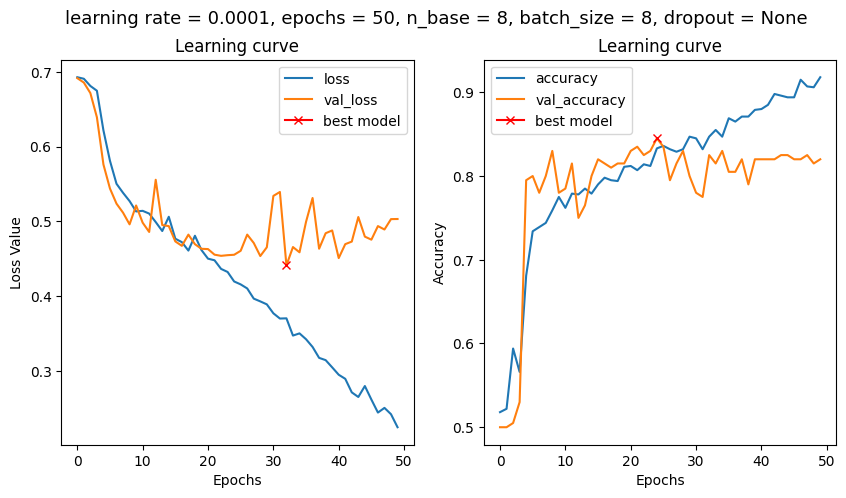

In [4]:
learning_rate =0.0001
epochs = 50
batch_size = 8
n_base = 8
dropout = None
n_class = 2
first2_dense = [64, 64] 
batch_norm = False
s_dropout = None
loss = "BinaryCrossentropy"
optimizer = "Adam"
model_type = "alexnet"

#training model with specified settings
clf_hist = model_trainer(learning_rate = learning_rate, epochs = epochs, 
                         x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test,
                             n_base = n_base, batch_size = batch_size ,dropout = dropout, batch_norm = batch_norm,
                             s_dropout = s_dropout, loss = loss, optimizer = optimizer, model_type = model_type, 
                             first2_dense = first2_dense,verbose = 0)

#plotting graph of loss and accuracy for corresponding settings
loss_accuracy_plot(clf_hist, "learning rate = {}, epochs = {}, n_base = {}, batch_size = {}, dropout = {}".format(learning_rate,
                                                                                                            epochs,
                                                                                                            n_base,batch_size,
                                                                                                                 dropout))

With dropout = 0.4:

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 128, 128, 8)       80        
                                                                 
 activation_8 (Activation)   (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 16)        1168      
                                                                 
 activation_9 (Activation)   (None, 64, 64, 16)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                  

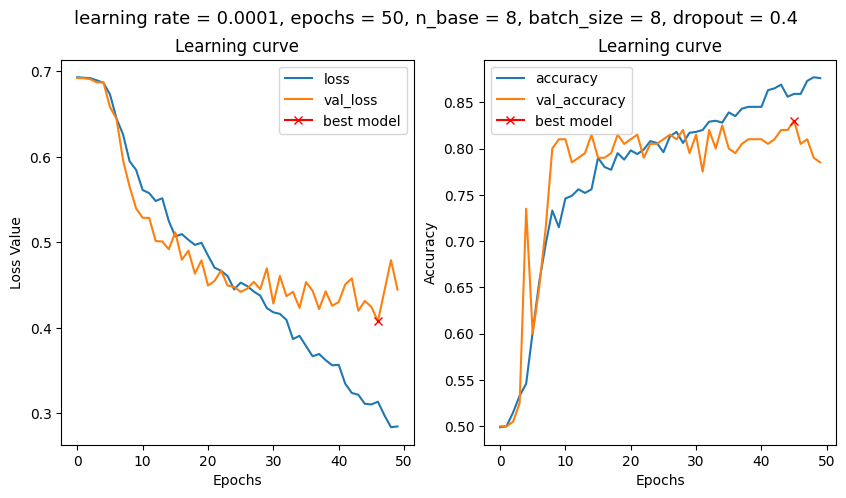

In [5]:
learning_rate =0.0001
epochs = 50
batch_size = 8
n_base = 8
dropout = 0.4
n_class = 2
first2_dense = [64, 64] 
batch_norm = False
s_dropout = None
loss = "BinaryCrossentropy"
optimizer = "Adam"
model_type = "alexnet"

#training model with specified settings
clf_hist = model_trainer(learning_rate = learning_rate, epochs = epochs, 
                         x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test,
                             n_base = n_base, batch_size = batch_size ,dropout = dropout, batch_norm = batch_norm,
                             s_dropout = s_dropout, loss = loss, optimizer = optimizer, model_type = model_type, 
                             first2_dense = first2_dense,verbose = 0)

#plotting graph of loss and accuracy for corresponding settings
loss_accuracy_plot(clf_hist, "learning rate = {}, epochs = {}, n_base = {}, batch_size = {}, dropout = {}".format(learning_rate,
                                                                                                            epochs,
                                                                                                            n_base,batch_size,
                                                                                                                 dropout))

### Task 5b)

Now we will include batch normalization for the cases without dropout and with dropout = 0.4

Batch Normalization without dropout:

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 8)       80        
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 8)      32        
 ormalization)                                                   
                                                                 
 activation_16 (Activation)  (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 16)        1168      
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 16)      

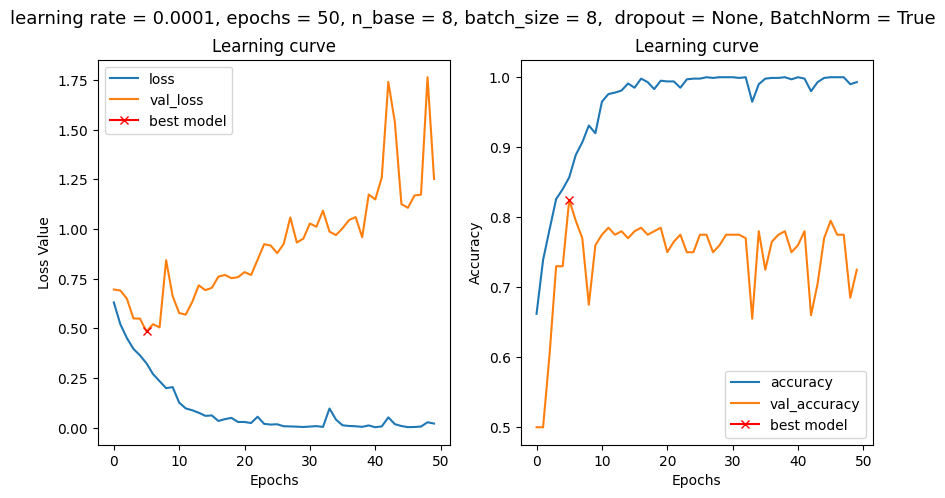

In [6]:
learning_rate =0.0001
epochs = 50
batch_size = 8
n_base = 8
dropout = None
n_class = 2
first2_dense = [64, 64] 
batch_norm = True
s_dropout = None
loss = "BinaryCrossentropy"
optimizer = "Adam"
model_type = "alexnet"

#training model with specified settings
clf_hist = model_trainer(learning_rate = learning_rate, epochs = epochs, 
                         x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test,
                             n_base = n_base, batch_size = batch_size ,dropout = dropout, batch_norm = batch_norm,
                             s_dropout = s_dropout, loss = loss, optimizer = optimizer, model_type = model_type, 
                             first2_dense = first2_dense,verbose = 0)

#plotting graph of loss and accuracy for corresponding settings
loss_accuracy_plot(clf_hist, "learning rate = {}, epochs = {}, n_base = {}, batch_size = {},  dropout = {}, BatchNorm = {}".format(learning_rate,
                                                                                                            epochs,
                                                                                                            n_base,batch_size,
                                                                                                            dropout, batch_norm))

Batch Normalization with dropout = 0.4

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 128, 128, 8)       80        
                                                                 
 batch_normalization_5 (Batc  (None, 128, 128, 8)      32        
 hNormalization)                                                 
                                                                 
 activation_24 (Activation)  (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 64, 16)        1168      
                                                                 
 batch_normalization_6 (Batc  (None, 64, 64, 16)      

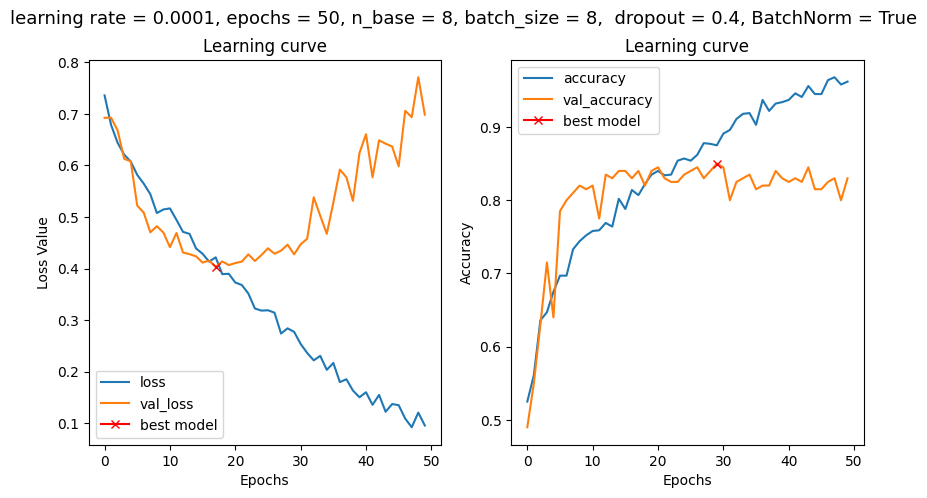

In [7]:
learning_rate =0.0001
epochs = 50
batch_size = 8
n_base = 8
dropout = 0.4
n_class = 2
first2_dense = [64, 64] 
batch_norm = True
s_dropout = None
loss = "BinaryCrossentropy"
optimizer = "Adam"
model_type = "alexnet"

#training model with specified settings
clf_hist = model_trainer(learning_rate = learning_rate, epochs = epochs, 
                         x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test,
                             n_base = n_base, batch_size = batch_size ,dropout = dropout, batch_norm = batch_norm,
                             s_dropout = s_dropout, loss = loss, optimizer = optimizer, model_type = model_type, 
                             first2_dense = first2_dense,verbose = 0)

#plotting graph of loss and accuracy for corresponding settings
loss_accuracy_plot(clf_hist, "learning rate = {}, epochs = {}, n_base = {}, batch_size = {},  dropout = {}, BatchNorm = {}".format(learning_rate,
                                                                                                            epochs,
                                                                                                            n_base,batch_size,
                                                                                                            dropout, batch_norm))

### Task 5c)

Training Alexnet with following settings with and without batch normalization:
- learning rate = 0.00001
- epochs = 80
- dropout = 0.4

Without Batch normalization:

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 128, 128, 8)       80        
                                                                 
 activation_32 (Activation)  (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 64, 64, 16)        1168      
                                                                 
 activation_33 (Activation)  (None, 64, 64, 16)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                 

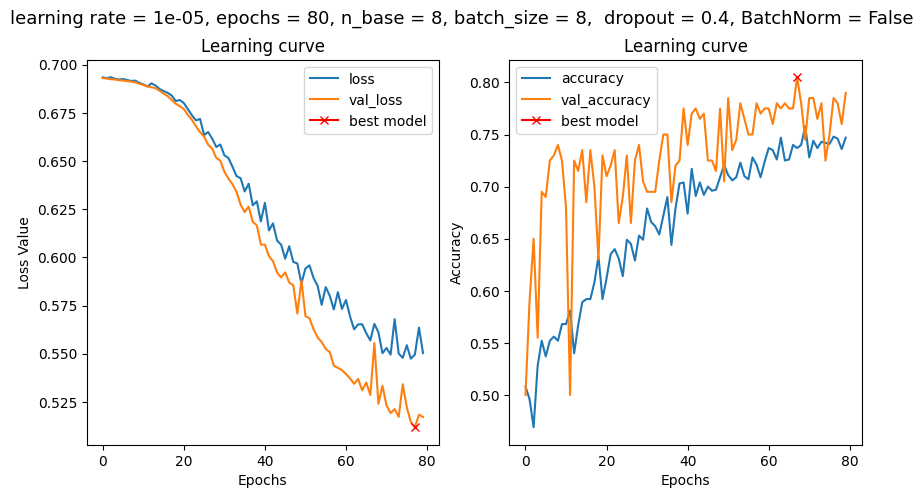

In [8]:
learning_rate = 0.00001
epochs = 80
batch_size = 8
n_base = 8
dropout = 0.4
n_class = 2
first2_dense = [64, 64] 
batch_norm = False
s_dropout = None
loss = "BinaryCrossentropy"
optimizer = "Adam"
model_type = "alexnet"

#training model with specified settings
clf_hist = model_trainer(learning_rate = learning_rate, epochs = epochs, 
                         x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test,
                             n_base = n_base, batch_size = batch_size ,dropout = dropout, batch_norm = batch_norm,
                             s_dropout = s_dropout, loss = loss, optimizer = optimizer, model_type = model_type, 
                             first2_dense = first2_dense,verbose = 0)

#plotting graph of loss and accuracy for corresponding settings
loss_accuracy_plot(clf_hist, "learning rate = {}, epochs = {}, n_base = {}, batch_size = {},  dropout = {}, BatchNorm = {}".format(learning_rate,
                                                                                                            epochs,
                                                                                                            n_base,batch_size,
                                                                                                            dropout, batch_norm))

With Batch normalization:

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 128, 128, 8)       80        
                                                                 
 batch_normalization_10 (Bat  (None, 128, 128, 8)      32        
 chNormalization)                                                
                                                                 
 activation_40 (Activation)  (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 64, 64, 16)        1168      
                                                                 
 batch_normalization_11 (Bat  (None, 64, 64, 16)      

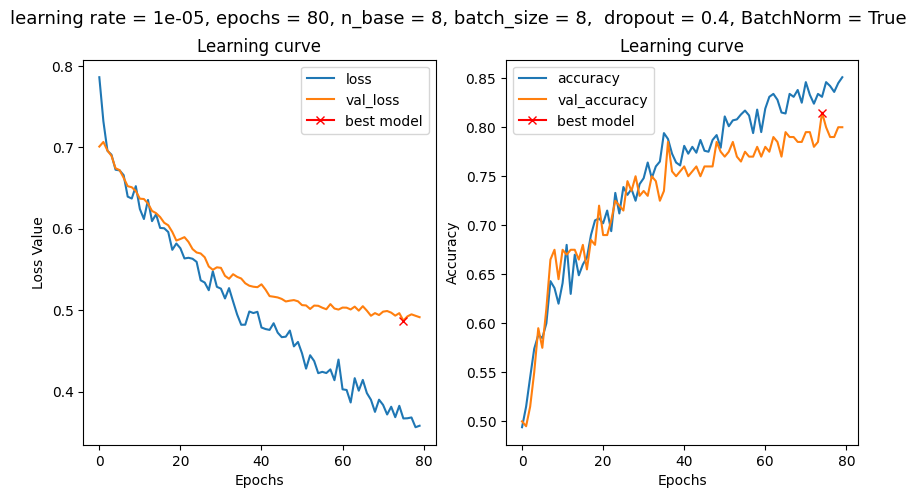

In [9]:
learning_rate = 0.00001
epochs = 80
batch_size = 8
n_base = 8
dropout = 0.4
n_class = 2
first2_dense = [64, 64] 
batch_norm = True
s_dropout = None
loss = "BinaryCrossentropy"
optimizer = "Adam"
model_type = "alexnet"

#training model with specified settings
clf_hist = model_trainer(learning_rate = learning_rate, epochs = epochs, 
                         x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test,
                             n_base = n_base, batch_size = batch_size ,dropout = dropout, batch_norm = batch_norm,
                             s_dropout = s_dropout, loss = loss, optimizer = optimizer, model_type = model_type, 
                             first2_dense = first2_dense,verbose = 0)

#plotting graph of loss and accuracy for corresponding settings
loss_accuracy_plot(clf_hist, "learning rate = {}, epochs = {}, n_base = {}, batch_size = {},  dropout = {}, BatchNorm = {}".format(learning_rate,
                                                                                                            epochs,
                                                                                                            n_base,batch_size,
                                                                                                            dropout, batch_norm))

### Task 5d)

Different than Task 5c, now we will use epoch = 150.

Without Batch normalization:

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 128, 128, 8)       80        
                                                                 
 activation_48 (Activation)  (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 64, 64, 16)        1168      
                                                                 
 activation_49 (Activation)  (None, 64, 64, 16)        0         
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                 

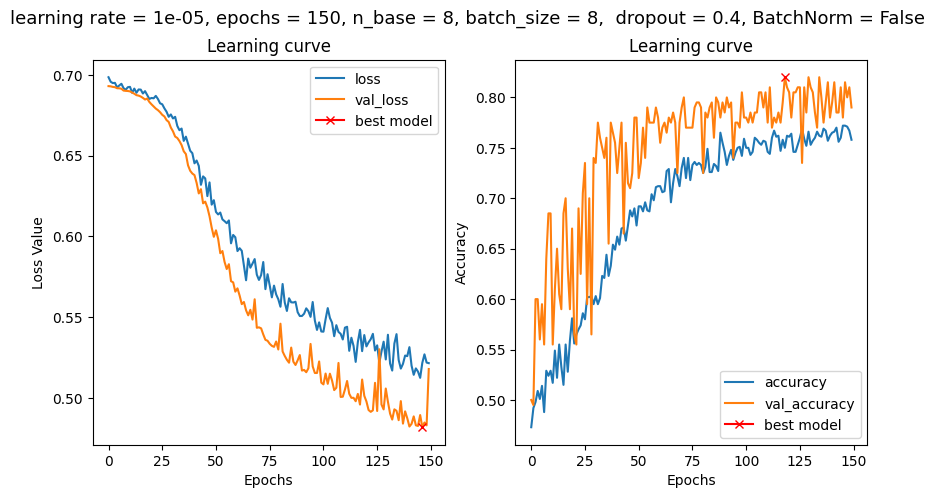

In [10]:
learning_rate = 0.00001
epochs = 150
batch_size = 8
n_base = 8
dropout = 0.4
n_class = 2
first2_dense = [64, 64] 
batch_norm = False
s_dropout = None
loss = "BinaryCrossentropy"
optimizer = "Adam"
model_type = "alexnet"

#training model with specified settings
clf_hist = model_trainer(learning_rate = learning_rate, epochs = epochs, 
                         x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test,
                             n_base = n_base, batch_size = batch_size ,dropout = dropout, batch_norm = batch_norm,
                             s_dropout = s_dropout, loss = loss, optimizer = optimizer, model_type = model_type, 
                             first2_dense = first2_dense,verbose = 0)

#plotting graph of loss and accuracy for corresponding settings
loss_accuracy_plot(clf_hist, "learning rate = {}, epochs = {}, n_base = {}, batch_size = {},  dropout = {}, BatchNorm = {}".format(learning_rate,
                                                                                                            epochs,
                                                                                                            n_base,batch_size,
                                                                                                            dropout, batch_norm))

With Batch Normalization:

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 128, 128, 8)       80        
                                                                 
 batch_normalization_15 (Bat  (None, 128, 128, 8)      32        
 chNormalization)                                                
                                                                 
 activation_56 (Activation)  (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 64, 64, 16)        1168      
                                                                 
 batch_normalization_16 (Bat  (None, 64, 64, 16)      

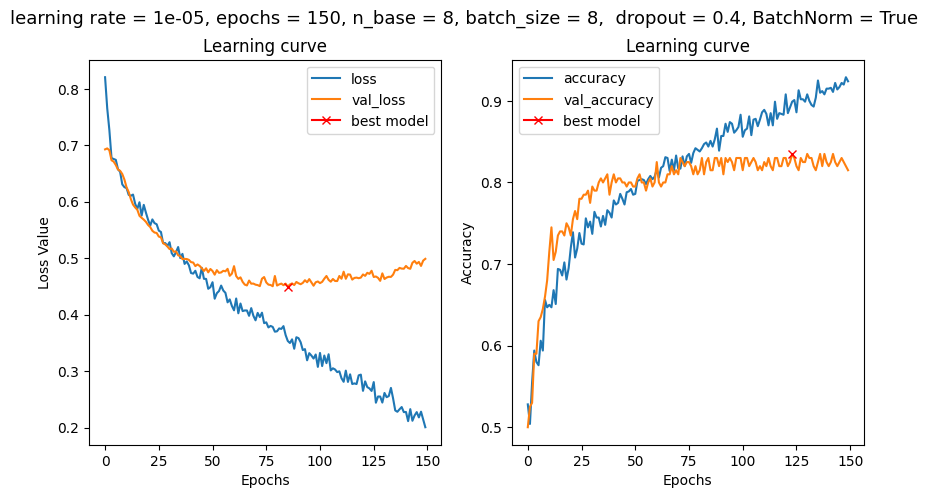

In [11]:
learning_rate = 0.00001
epochs = 150
batch_size = 8
n_base = 8
dropout = 0.4
n_class = 2
first2_dense = [64, 64] 
batch_norm = True
s_dropout = None
loss = "BinaryCrossentropy"
optimizer = "Adam"
model_type = "alexnet"

#training model with specified settings
clf_hist = model_trainer(learning_rate = learning_rate, epochs = epochs, 
                         x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test,
                             n_base = n_base, batch_size = batch_size ,dropout = dropout, batch_norm = batch_norm,
                             s_dropout = s_dropout, loss = loss, optimizer = optimizer, model_type = model_type, 
                             first2_dense = first2_dense,verbose = 0)

#plotting graph of loss and accuracy for corresponding settings
loss_accuracy_plot(clf_hist, "learning rate = {}, epochs = {}, n_base = {}, batch_size = {},  dropout = {}, BatchNorm = {}".format(learning_rate,
                                                                                                            epochs,
                                                                                                            n_base,batch_size,
                                                                                                            dropout, batch_norm))

### Task 6a)

Now instead of batch normalization, we introduce spatial dropout layers. We will deactive batch normalization and instead use spatial dropout at each convolutional layer with a spatial dropout rate = 0.1 and normal dropout rate = 0.4

With spatial dropout = 0.1:

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 128, 128, 32)      320       
                                                                 
 activation_64 (Activation)  (None, 128, 128, 32)      0         
                                                                 
 spatial_dropout2d (SpatialD  (None, 128, 128, 32)     0         
 ropout2D)                                                       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 activation_65 (Activation)  (None, 64, 64, 64)       

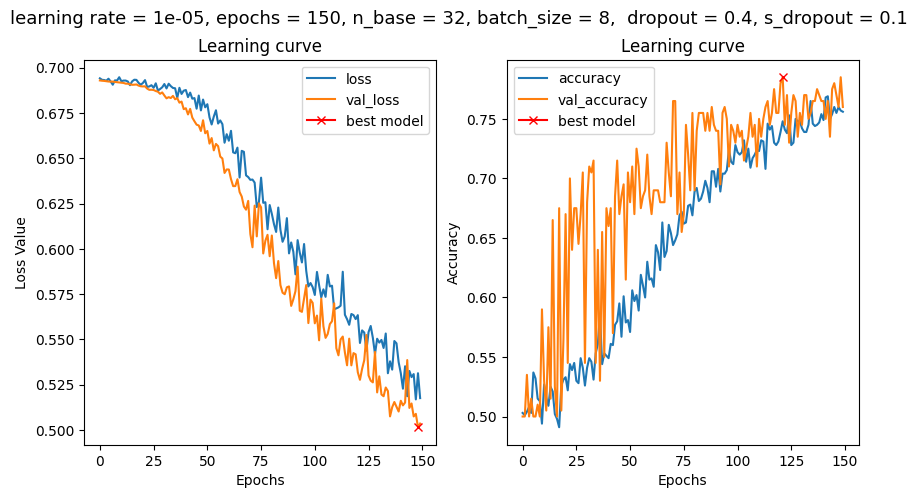

In [12]:
learning_rate = 0.00001
epochs = 150
batch_size = 8
n_base = 32
dropout = 0.4
n_class = 2
first2_dense = [64, 64] 
batch_norm = False
s_dropout = 0.1
loss = "BinaryCrossentropy"
optimizer = "Adam"
model_type = "alexnet"

#training model with specified settings
clf_hist = model_trainer(learning_rate = learning_rate, epochs = epochs, 
                         x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test,
                             n_base = n_base, batch_size = batch_size ,dropout = dropout, batch_norm = batch_norm,
                             s_dropout = s_dropout, loss = loss, optimizer = optimizer, model_type = model_type, 
                             first2_dense = first2_dense,verbose = 0)

#plotting graph of loss and accuracy for corresponding settings
loss_accuracy_plot(clf_hist, "learning rate = {}, epochs = {}, n_base = {}, batch_size = {},  dropout = {}, s_dropout = {}".format(learning_rate,
                                                                                                            epochs,
                                                                                                            n_base,batch_size,
                                                                                                            dropout, s_dropout))

Without spatial dropout:

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 128, 128, 32)      320       
                                                                 
 activation_72 (Activation)  (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 activation_73 (Activation)  (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                 

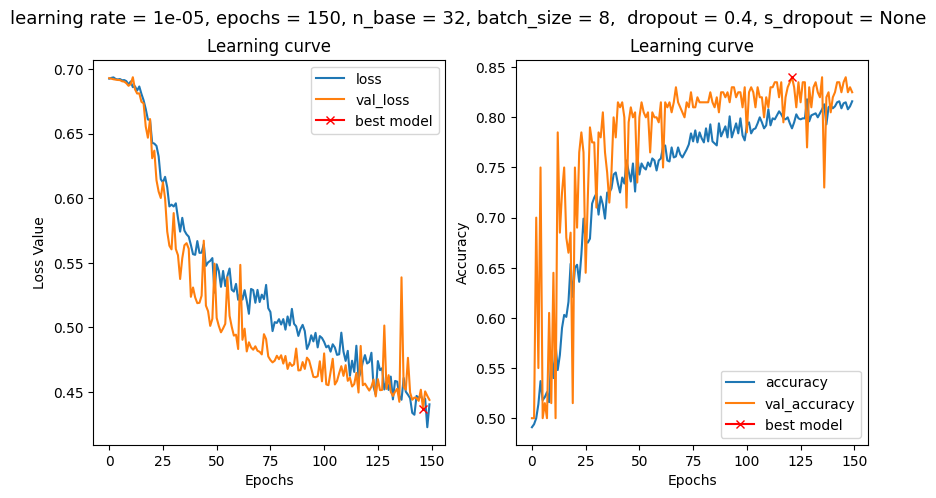

In [13]:
learning_rate = 0.00001
epochs = 150
batch_size = 8
n_base = 32
dropout = 0.4
n_class = 2
first2_dense = [64, 64] 
batch_norm = False
s_dropout = None
loss = "BinaryCrossentropy"
optimizer = "Adam"
model_type = "alexnet"

#training model with specified settings
clf_hist = model_trainer(learning_rate = learning_rate, epochs = epochs, 
                         x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test,
                             n_base = n_base, batch_size = batch_size ,dropout = dropout, batch_norm = batch_norm,
                             s_dropout = s_dropout, loss = loss, optimizer = optimizer, model_type = model_type, 
                             first2_dense = first2_dense,verbose = 0)

#plotting graph of loss and accuracy for corresponding settings
loss_accuracy_plot(clf_hist, "learning rate = {}, epochs = {}, n_base = {}, batch_size = {},  dropout = {}, s_dropout = {}".format(learning_rate,
                                                                                                            epochs,
                                                                                                            n_base,batch_size,
                                                                                                            dropout, s_dropout))

### Task 6b)

As an update to Task 6a, now we will run the same settings with 250 epochs.

With spatial dropout = 0.1:

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 128, 128, 32)      320       
                                                                 
 activation_80 (Activation)  (None, 128, 128, 32)      0         
                                                                 
 spatial_dropout2d_5 (Spatia  (None, 128, 128, 32)     0         
 lDropout2D)                                                     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 activation_81 (Activation)  (None, 64, 64, 64)      

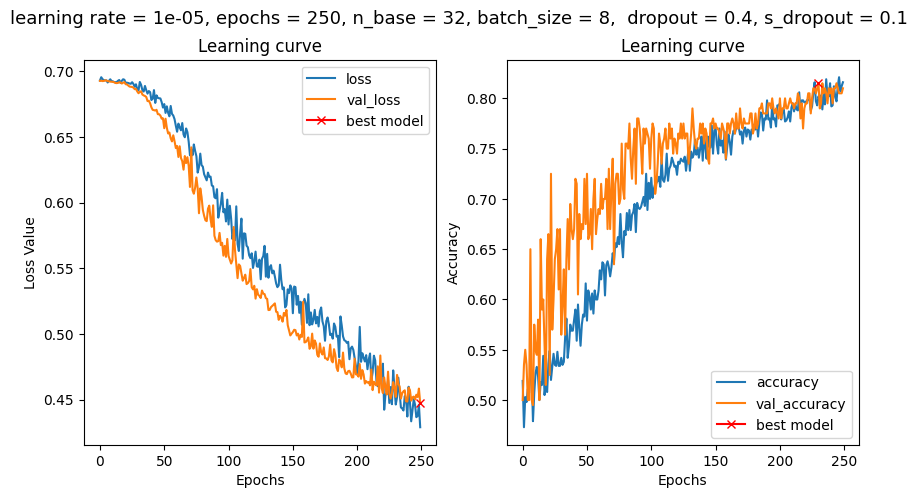

In [14]:
learning_rate = 0.00001
epochs = 250
batch_size = 8
n_base = 32
dropout = 0.4
n_class = 2
first2_dense = [64, 64] 
batch_norm = False
s_dropout = 0.1
loss = "BinaryCrossentropy"
optimizer = "Adam"
model_type = "alexnet"

#training model with specified settings
clf_hist = model_trainer(learning_rate = learning_rate, epochs = epochs, 
                         x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test,
                             n_base = n_base, batch_size = batch_size ,dropout = dropout, batch_norm = batch_norm,
                             s_dropout = s_dropout, loss = loss, optimizer = optimizer, model_type = model_type, 
                             first2_dense = first2_dense,verbose = 0)

#plotting graph of loss and accuracy for corresponding settings
loss_accuracy_plot(clf_hist, "learning rate = {}, epochs = {}, n_base = {}, batch_size = {},  dropout = {}, s_dropout = {}".format(learning_rate,
                                                                                                            epochs,
                                                                                                            n_base,batch_size,
                                                                                                            dropout, s_dropout))

Without spatial dropout:

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 128, 128, 32)      320       
                                                                 
 activation_88 (Activation)  (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 activation_89 (Activation)  (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                

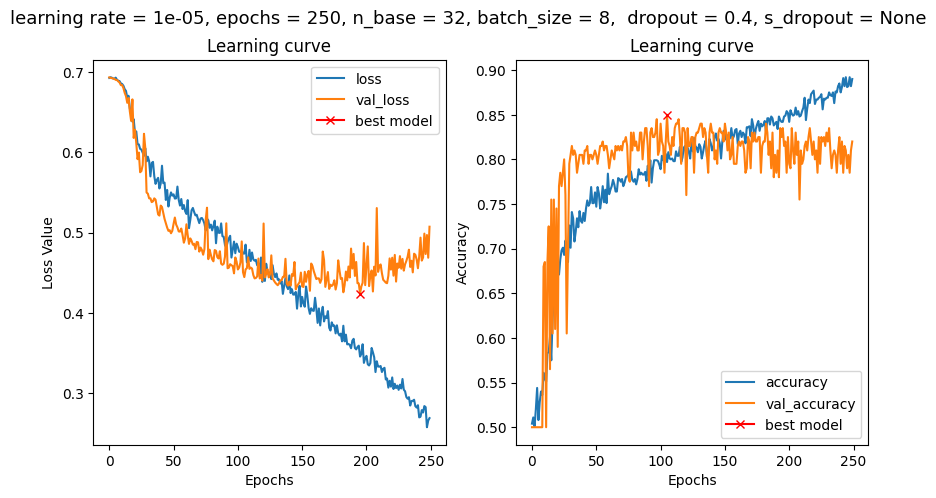

In [15]:
learning_rate = 0.00001
epochs = 250
batch_size = 8
n_base = 32
dropout = 0.4
n_class = 2
first2_dense = [64, 64] 
batch_norm = False
s_dropout = None
loss = "BinaryCrossentropy"
optimizer = "Adam"
model_type = "alexnet"

#training model with specified settings
clf_hist = model_trainer(learning_rate = learning_rate, epochs = epochs, 
                         x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test,
                             n_base = n_base, batch_size = batch_size ,dropout = dropout, batch_norm = batch_norm,
                             s_dropout = s_dropout, loss = loss, optimizer = optimizer, model_type = model_type, 
                             first2_dense = first2_dense,verbose = 0)

#plotting graph of loss and accuracy for corresponding settings
loss_accuracy_plot(clf_hist, "learning rate = {}, epochs = {}, n_base = {}, batch_size = {},  dropout = {}, s_dropout = {}".format(learning_rate,
                                                                                                            epochs,
                                                                                                            n_base,batch_size,
                                                                                                            dropout, s_dropout))